GENERALIZATION USING SCIKIT LEARN

In [1]:
%matplotlib inline
#! Required python packages: numpy, scipy, scikit-learn,
# matplotlib, seaborn, pandas, tqdm, ipywidgets
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()
import pandas as pd
from tqdm.notebook import tqdm

np.random.seed(17)
plt.rcParams['figure.figsize'] = [9.5, 6]

1st step: load the images from sklearn datasets

In [7]:
from sklearn.datasets import load_digits
dataset = load_digits()
imgs = dataset['images'] # shape (1797, 8, 8)
targets = dataset['target'] # shape (1797,)
print(np.size(imgs))

115008


2nd step: show the images

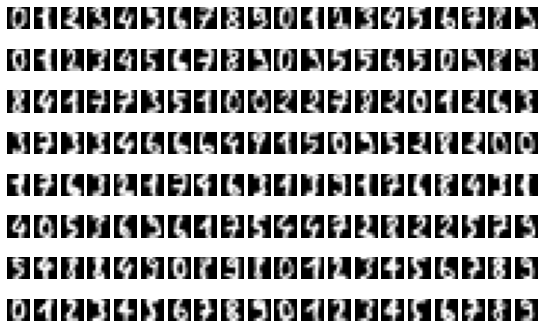

In [8]:
nrows, ncols = 8, 20
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex="all", sharey="all")
for j in range(ncols):
    for i in range(nrows):
        ax[i][j].imshow(imgs[ncols * i + j], cmap=plt.cm.gray)
        ax[i][j].axis('off')

Flatten the images into a vector and select 450 out of 1797 images


In [5]:
num_samples = 450
xs = np.reshape(imgs, newshape=[-1, 8 * 8]) # shape (1797, 64)
ys = targets # shape (1797,)

ix = np.random.choice(len(xs), size=num_samples, replace=False)
xs = xs[ix] # shape (num_samples, 64)
ys = ys[ix] # shape (num_samples,)


Split the dataset into two non overlaping datasets

In [10]:
from typing import Tuple
def split_into_subsets(X: np.ndarray, Y: np.ndarray, sizes: Tuple):
    """ 
    Splits two np.ndarrays randomly into non-overlapping np.ndarrays 
    according to some given sizes
    """
    assert len(X) == len(Y), "Lengths of arrays need to match!"
    assert isinstance(sizes[0], float), "Provide float arguments please!"
    assert isinstance(sizes[1], float), "Provide float arguments please!"
    sizes = np.array(sizes)
    sizes /= sizes.sum()
    n = len(X)
    ix = np.random.permutation(n)
    intervals = np.insert(sizes, 0, 0)
    breaks = (n * np.cumsum(intervals)).astype(int)
    sub_ix = [ix[breaks[i]:breaks[i + 1]] for i in range(len(sizes))]
    sub_arrs_X = [X[k] for k in sub_ix]
    sub_arrs_Y = [Y[k] for k in sub_ix]
    return sub_arrs_X, sub_arrs_Y
    

Split the data into training set, validation set, and test set

In [12]:
a,b= split_into_subsets(xs, ys, (300.0, 150.0))
#xs_now=xs-xs_train  
xs_train, x_x = a
ys_train, y_y = b
a,b= split_into_subsets(x_x, y_y, (50.0, 100.0))
xs_val, xs_test=a
ys_val, ys_test=b 

print('shape of xs_train ', xs_train.shape, '  shape of ys_train ', ys_train.shape, '\nshape of xs_val   ', xs_val.shape, '   shape of ys_val   ', ys_val.shape, '\nshape of xs_test  ', xs_test.shape, '  shape of ys_test  ', ys_test.shape)


shape of xs_train  (300, 64)   shape of ys_train  (300,) 
shape of xs_val    (50, 64)    shape of ys_val    (50,) 
shape of xs_test   (100, 64)   shape of ys_test   (100,)


Fit an SVM to Dtrain

In [21]:
from sklearn.svm import SVC

def fit_SVM(xs,ys,d=1,C=0.5):
  """ Fits polynomial kernel soft-margin SVM to the supplied data
      xs = data vector of shape (num_samples, 64)
      ys = label vector of shape (num_samples,)
      d = polynomial degree
      C = cost
      output: h (the fitted model)
  """
  h = SVC(C = C, kernel = 'poly', degree = d)
  h.fit(xs[:np.newaxis], ys[: np.newaxis])
  return h


Make predictions using a fitted model h1

In [16]:
from sklearn.metrics import zero_one_loss
from sklearn.metrics import accuracy_score
def h_predict(h,xs,ys):
  """
  xs = data vector of shape (num_samples, 64)
  ys = label vector of shape (num_samples,)
  h  = the fitted model
  output:
  y_pred = prediction vector of shape (num_samples,)
  l01 = the zero-one loss
  acc = the accuracy expressed as a percentage
  """
  
  ys_pred = h.predict(xs) 
  l01 = zero_one_loss(ys_pred, ys)
  acc = accuracy_score(ys_pred, ys) 

  return ys_pred, l01, acc

Create a function to plot some digits

<Figure size 800x480 with 0 Axes>

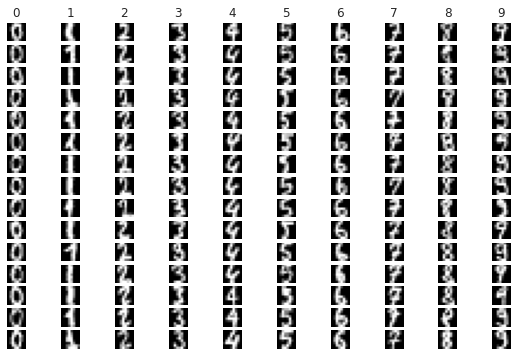

In [20]:
def plot_digits(xs, ys, nrows=8):
    """
    A function to plot the MNIST digit array sorted by a label vector
    xs = shape (num_samples, 64)
    ys = shape (num_samples,)
    nrows = the number of rows you'd like to see displayed
    """
    ncols = 10
    figure(figsize = (10, 6), dpi = 80);
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex="all", sharey="all")
    for j in range(ncols):
        class_inds = np.argwhere(ys == j)
        for i in range(nrows):
          ax[i][j].axis('off')
        for i in range(min(nrows, class_inds.size)):
            x = xs[class_inds[i]]
            if x.size == 64:
                x = x.reshape((8,8))
                ax[i][j].imshow(x, cmap=plt.cm.gray)
                # ax[i][j].axis('off')
                if i == 0:
                  ax[i][j].set_title(j)
plot_digits(xs_train,ys_train,15)

Plot a sample of the predictions from the trained model

Empirical risk R(h_1): 0.057
Accuracy       h_1(xs_train): 94.333%


<Figure size 800x480 with 0 Axes>

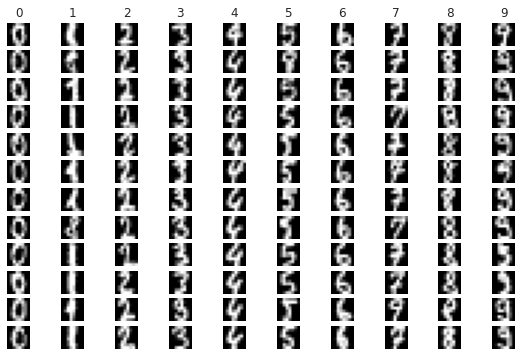

In [24]:
h_1 = fit_SVM(xs_train,ys_train)
preds, risk, acc = h_predict(h_1, xs_train, ys_train)
print("Empirical risk R(h_1): {:.3f}".format(risk))
print("Accuracy       h_1(xs_train): {:.3f}%".format(acc * 100))
plot_digits(xs_train, preds,12)